# ***Importing Libraries***

In [271]:
import pandas as pd
import numpy as np

# ***Loading The Data***

In [272]:
data = pd.read_csv('/content/nearest-earth-objects(1910-2024).csv')
data

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.140,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.500,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.450,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.630,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.700,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False
...,...,...,...,...,...,...,...,...,...
338194,54403809,(2023 VS4),28.580,0.005112,0.011430,Earth,56646.985988,6.406548e+07,False
338195,54415298,(2023 XW5),28.690,0.004859,0.010865,Earth,21130.768947,2.948883e+07,False
338196,54454871,(2024 KJ7),21.919,0.109839,0.245607,Earth,11832.041031,5.346078e+07,False
338197,54456245,(2024 NE),23.887,0.044377,0.099229,Earth,56198.382733,5.184742e+06,False


# ***Cleaning Data***

1.   missing values
2.   check outliers
3.   duplicates
4.   dealing with text inconsistencies



In [273]:
data.isnull().sum()

,0
neo_id,0
name,0
absolute_magnitude,28
estimated_diameter_min,28
estimated_diameter_max,28
orbiting_body,0
relative_velocity,0
miss_distance,0
is_hazardous,0


In [274]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
data['absolute_magnitude'] = imputer.fit_transform(data[['absolute_magnitude']])

In [275]:
data.isnull().sum()

,0
neo_id,0
name,0
absolute_magnitude,0
estimated_diameter_min,28
estimated_diameter_max,28
orbiting_body,0
relative_velocity,0
miss_distance,0
is_hazardous,0


In [276]:
mean = data['estimated_diameter_min'].mean()
data['estimated_diameter_min'].fillna(mean, inplace = True)

In [277]:
data.isnull().sum()

,0
neo_id,0
name,0
absolute_magnitude,0
estimated_diameter_min,0
estimated_diameter_max,28
orbiting_body,0
relative_velocity,0
miss_distance,0
is_hazardous,0


In [278]:
mean = data['estimated_diameter_max'].mean()
data['estimated_diameter_max'].fillna(mean, inplace = True)

In [279]:
data.isnull().sum()

,0
neo_id,0
name,0
absolute_magnitude,0
estimated_diameter_min,0
estimated_diameter_max,0
orbiting_body,0
relative_velocity,0
miss_distance,0
is_hazardous,0


In [280]:
data.duplicated().sum()

0

In [281]:
data['orbiting_body'].value_counts()

,count
orbiting_body,
Earth,338199


In [282]:
data['is_hazardous'].value_counts()

,count
is_hazardous,
False,295037
True,43162


In [283]:
data.drop('neo_id', axis = 1, inplace = True)

# ***EDA***

In [284]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   name                    338199 non-null  object 
 1   absolute_magnitude      338199 non-null  float64
 2   estimated_diameter_min  338199 non-null  float64
 3   estimated_diameter_max  338199 non-null  float64
 4   orbiting_body           338199 non-null  object 
 5   relative_velocity       338199 non-null  float64
 6   miss_distance           338199 non-null  float64
 7   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), object(2)
memory usage: 18.4+ MB


In [285]:
data.shape

(338199, 8)

In [286]:
data.describe()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,338199.000000,338199.000000,338199.000000,338199.000000,3.381990e+05
mean,22.932525,0.157812,0.352878,51060.662908,4.153535e+07
std,2.911096,0.313872,0.701839,26399.238435,2.077399e+07
min,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,20.740000,0.025384,0.056760,30712.031471,2.494540e+07
50%,22.800000,0.073207,0.163697,47560.465474,4.332674e+07
75%,25.100000,0.189041,0.422708,66673.820614,5.933961e+07
max,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


# ***Preprocessing Data***
*   Label Encoding
*   Handling imbalanced data
*   Feature Selection







In [287]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['name'] = le.fit_transform(data['name'])

In [288]:
le = LabelEncoder()
data['is_hazardous'] = le.fit_transform(data['is_hazardous'])   #true =1, false = 0

In [289]:
le = LabelEncoder()
data['orbiting_body'] = le.fit_transform(data['orbiting_body'])

In [290]:
data

,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,30603,19.140,0.394962,0.883161,0,71745.401048,5.814362e+07,0
1,31395,18.500,0.530341,1.185878,0,109949.757148,5.580105e+07,1
2,32118,21.450,0.136319,0.304818,0,24865.506798,6.720689e+07,0
3,736,20.630,0.198863,0.444672,0,78890.076805,3.039644e+07,0
4,4880,22.700,0.076658,0.171412,0,56036.519484,6.311863e+07,0
...,...,...,...,...,...,...,...,...
338194,28670,28.580,0.005112,0.011430,0,56646.985988,6.406548e+07,0
338195,29007,28.690,0.004859,0.010865,0,21130.768947,2.948883e+07,0
338196,30094,21.919,0.109839,0.245607,0,11832.041031,5.346078e+07,0
338197,30271,23.887,0.044377,0.099229,0,56198.382733,5.184742e+06,0


In [291]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x,y)

In [292]:
x_smote.shape

(590074, 7)

In [293]:
y_smote.shape

(590074, 1)

In [294]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
L = LogisticRegression()
L.fit(x_smote, y_smote)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

# ***Data Visualization***

In [329]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

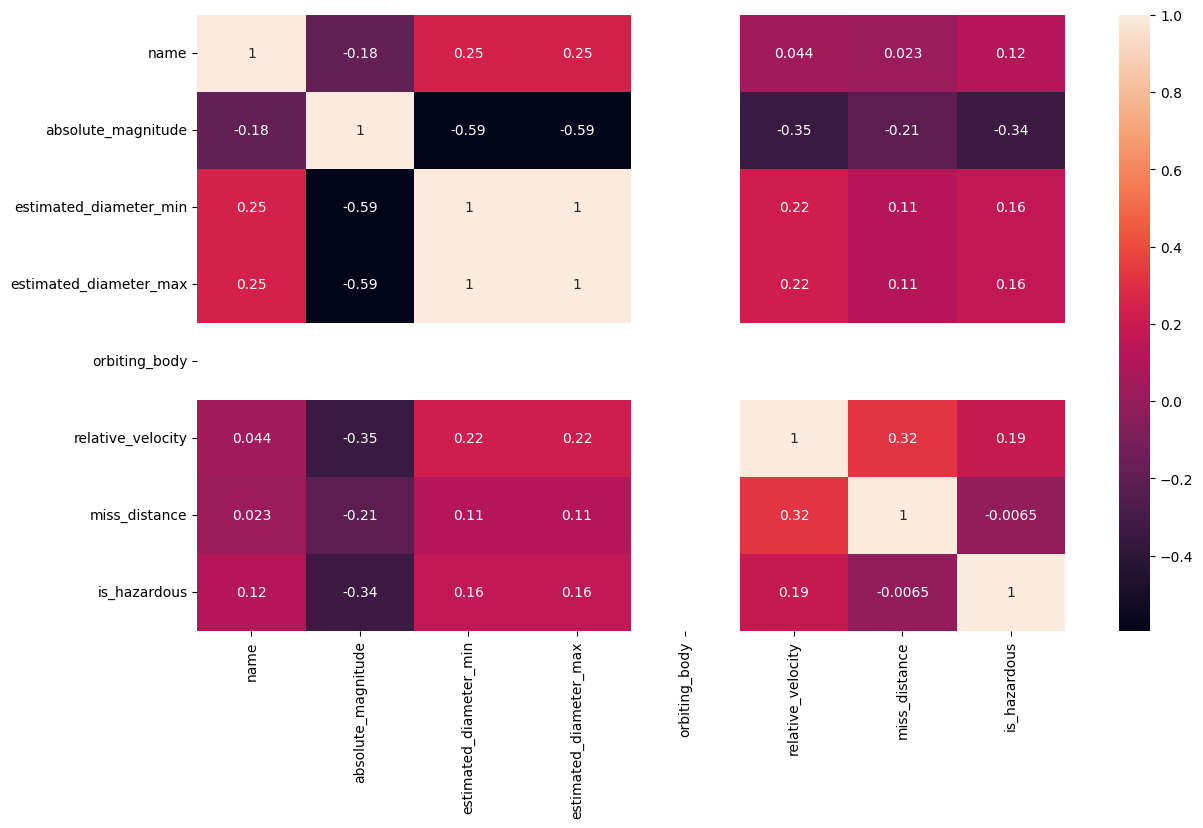

In [331]:
plt.figure(figsize = (14,8))
sns.heatmap(data.corr(),annot = True)

<Axes: >

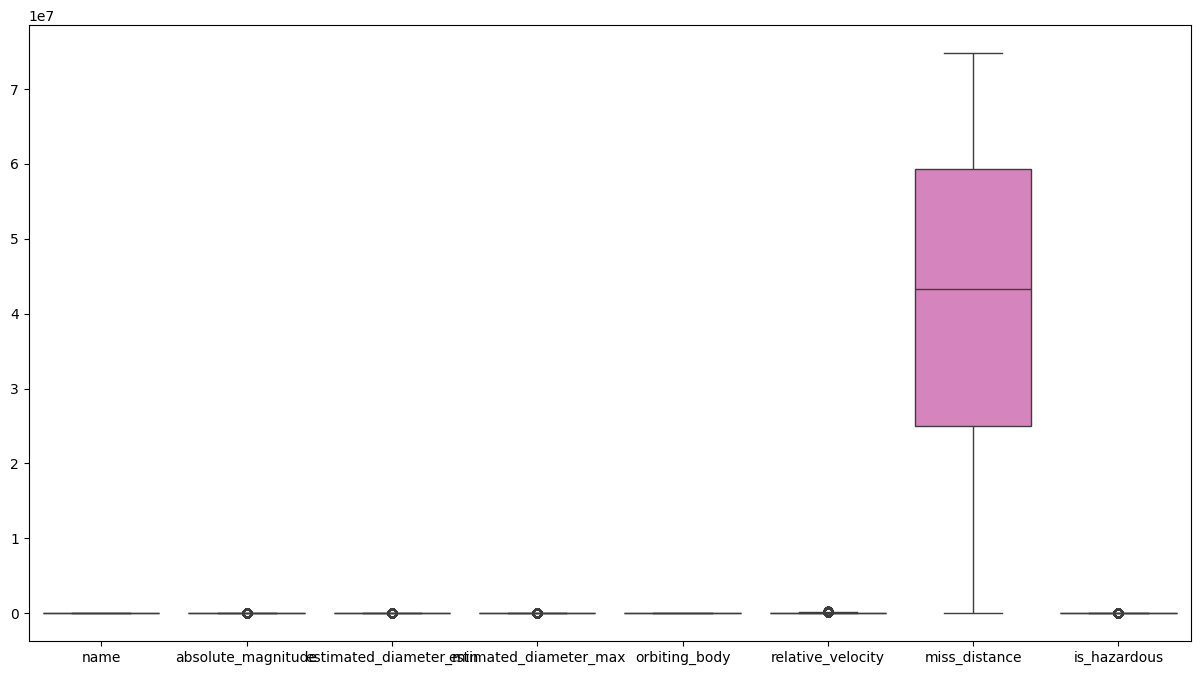

In [332]:
plt.figure(figsize= (15, 8))
sns.boxplot(data)

In [ ]:
data['is_hazardous'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', figsize = (10,8))
plt.title('is_hazardous')

Text(0.5, 1.0, 'is_hazardous')

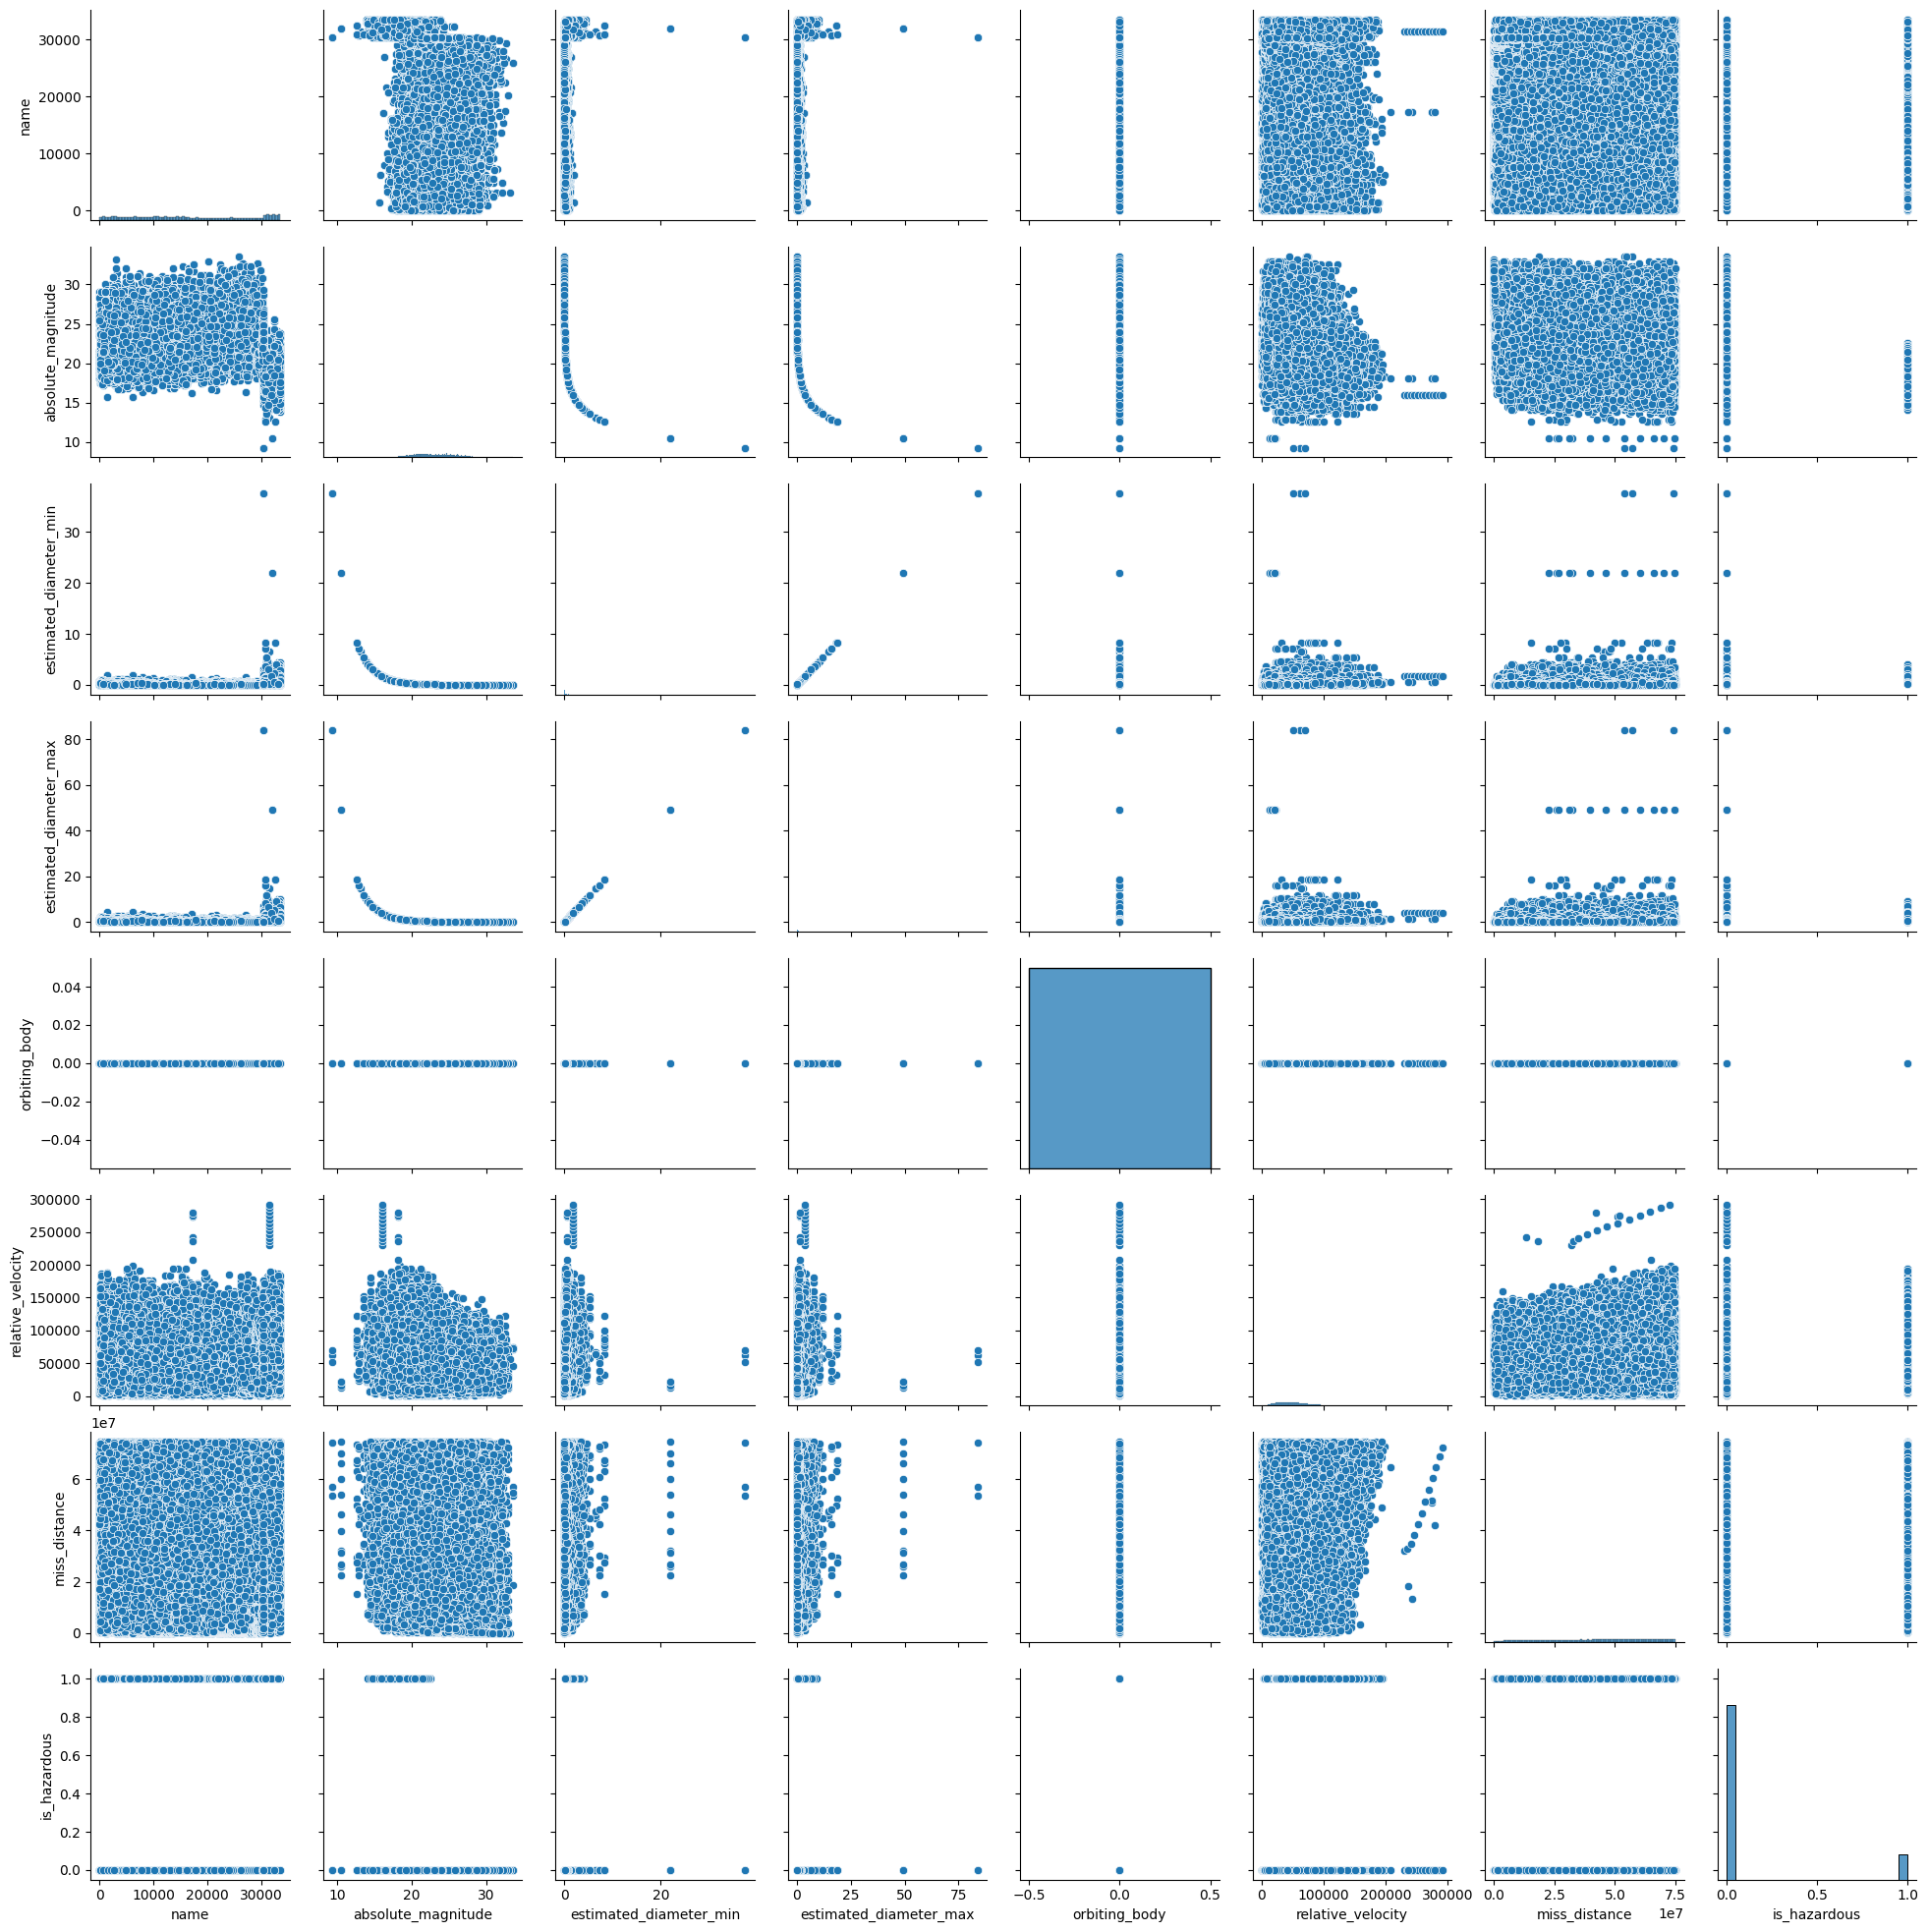

In [335]:
sns.pairplot(data)

# ***Splitting Data***

In [295]:
x = data.iloc[ : , :7]
x

,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance
0,30603,19.140,0.394962,0.883161,0,71745.401048,5.814362e+07
1,31395,18.500,0.530341,1.185878,0,109949.757148,5.580105e+07
2,32118,21.450,0.136319,0.304818,0,24865.506798,6.720689e+07
3,736,20.630,0.198863,0.444672,0,78890.076805,3.039644e+07
4,4880,22.700,0.076658,0.171412,0,56036.519484,6.311863e+07
...,...,...,...,...,...,...,...
338194,28670,28.580,0.005112,0.011430,0,56646.985988,6.406548e+07
338195,29007,28.690,0.004859,0.010865,0,21130.768947,2.948883e+07
338196,30094,21.919,0.109839,0.245607,0,11832.041031,5.346078e+07
338197,30271,23.887,0.044377,0.099229,0,56198.382733,5.184742e+06


In [296]:
y = data.iloc[ : , 7:8]
y

,is_hazardous
0,0
1,1
2,0
3,0
4,0
...,...
338194,0
338195,0
338196,0
338197,0


In [297]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.8, test_size=0.2, random_state=42)

# ***Scaling Data***

In [298]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
xscaled = sc.fit_transform(x_train)
xscaled


array([[0.20831344, 0.48705302, 0.00425224, ..., 0.        , 0.23800811,
        0.71485589],
       [0.18100979, 0.61857789, 0.00096364, ..., 0.        , 0.23364741,
        0.88778742],
       [0.95759728, 0.50431566, 0.00350204, ..., 0.        , 0.10055516,
        0.86995202],
       ...,
       [0.13905467, 0.4730785 , 0.0049753 , ..., 0.        , 0.2389348 ,
        0.37159353],
       [0.16053951, 0.5918619 , 0.00130466, ..., 0.        , 0.06606735,
        0.4081729 ],
       [0.93151707, 0.43485409, 0.00764246, ..., 0.        , 0.14334176,
        0.75510453]])

In [299]:
x_train

,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance
183838,6982,21.10,0.160160,0.358129,0,68371.136786,5.347218e+07
269345,6067,24.30,0.036691,0.082043,0,67122.191596,6.640606e+07
295431,32092,21.52,0.131994,0.295148,0,29003.301542,6.507212e+07
73173,33142,20.63,0.198863,0.444672,0,48603.671199,1.026725e+07
217719,2183,21.90,0.110804,0.247765,0,41499.455446,6.284894e+07
...,...,...,...,...,...,...,...
119879,12018,23.20,0.060891,0.136157,0,63131.149683,6.598797e+07
259178,16499,28.40,0.005553,0.012418,0,47951.223819,4.904972e+07
131932,4661,20.76,0.187307,0.418832,0,68636.548141,2.779893e+07
146867,5381,23.65,0.049494,0.110673,0,19125.666142,3.053477e+07


In [300]:
x_test

,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance
314861,14937,24.80,0.029144,0.065169,0,80069.237555,6.420707e+07
149426,4060,24.30,0.036691,0.082043,0,16827.610930,2.346194e+07
130485,720,22.40,0.088015,0.196807,0,40369.051264,3.631540e+07
107225,8667,20.98,0.169260,0.378477,0,36912.929965,3.391221e+07
270892,6451,23.50,0.053034,0.118588,0,33379.114710,3.502614e+07
...,...,...,...,...,...,...,...
295986,3984,22.04,0.103886,0.232295,0,70651.943199,7.375631e+07
233925,9672,20.50,0.211132,0.472106,0,37551.706753,1.353817e+07
180718,14109,22.07,0.102460,0.229108,0,2717.013990,5.255896e+07
10846,14746,23.20,0.060891,0.136157,0,38800.877128,4.821633e+07


# ***Modeling***

In [301]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [302]:
lr.score(x_train, y_train)

0.8721166178171859

In [303]:
lr.score(x_test, y_test)

0.8720579538734476

In [304]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10, criterion= 'gini')
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [305]:
dt.score(x_train, y_train)

0.8967803695312297

In [306]:
dt.score(x_test, y_test)

0.8940272028385571

In [311]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [312]:
RF.score(x_train, y_train)

0.9999963039484918

In [313]:
RF.score(x_test, y_test)

0.9778681253696038

# ***Model Evaluation***

In [315]:
from sklearn.metrics import recall_score
rs = recall_score(y_test, lr.predict(x_test))
rs

0.00023177656738903696

In [321]:
rs = recall_score(y_test, dt.predict(x_test))
rs

0.2519411287518832

In [322]:
rs = recall_score(y_test, RF.predict(x_test))
rs

0.8733341059218913

In [317]:
from sklearn.metrics import f1_score
f = f1_score(y_test, lr.predict(x_test))
f

0.000462000462000462

In [323]:
f = f1_score(y_test, dt.predict(x_test))
f

0.3775616533518583

In [324]:
f = f1_score(y_test, RF.predict(x_test))
f

0.9096505522361036

In [318]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lr.predict(x_test))
cm

array([[58984,    27],
       [ 8627,     2]])

In [319]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, dt.predict(x_test))
cm

array([[58298,   713],
       [ 6455,  2174]])

In [320]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, RF.predict(x_test))
cm

array([[58607,   404],
       [ 1093,  7536]])

In [326]:
from sklearn.model_selection import cross_val_score
c = cross_val_score(lr,y_test, lr.predict(x_test))
c

array([0.9996304 , 0.99955648, 0.99955648, 0.99955648, 0.99955648])

In [327]:
c = cross_val_score(lr,y_test, dt.predict(x_test))
c

array([0.95734772, 0.95734772, 0.95734772, 0.9572738 , 0.9572738 ])

In [328]:
c = cross_val_score(lr,y_test, RF.predict(x_test))
c

array([0.97797161, 0.9764932 , 0.97848906, 0.97841514, 0.97797161])